# <font size= 1> <font color='FFFFFF'> **Redes neuronales artificiales (RNA)**

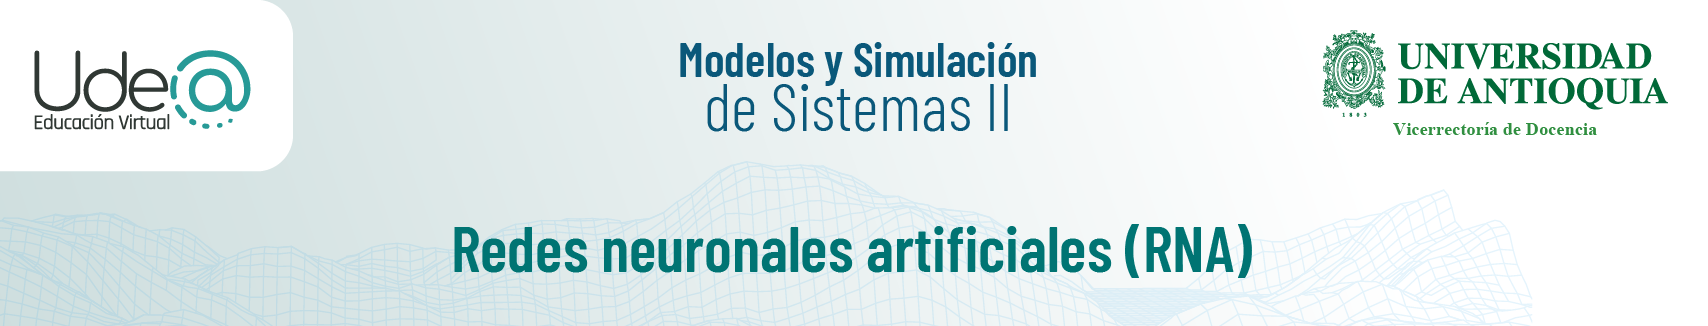

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image

Una red neuronal es un método de la inteligencia artificial que les enseña a las computadoras a procesar datos de una forma inspirada en el cerebro humano. Se trata de un tipo de proceso de machine learning llamado **aprendizaje profundo** que utiliza los nodos o las neuronas interconectados en una estructura de capas que se parece dicho órgano humano.

Así, crea un sistema adaptable que las computadoras utilizan para aprender de sus errores y mejorar continuamente. Por lo tanto, las redes neuronales artificiales intentan resolver problemas complicados, como la realización de resúmenes de documentos o el reconocimiento de rostros, con mayor precisión ([ver documentación](https://aws.amazon.com/es/what-is/neural-network/)).

Uno de los tipos más usados de RNA está basado en una unidad llamada **perceptrón**. Un perceptrón toma un vector de valores reales como entrada, calcula una combinación lineal de dichas entradas y produce una salida 1 si el resultado es mayor a algún umbral, y -1 en otro caso.

Una red neuronal artificial tiene tres tipos de capas:

<li>La capa de entrada: recibe las características o variables de las muestras a ser evaluadas.  </li>
<li>Las capas ocultas: son capas de perceptrones que permiten llevar a cabo la definición de fronteras complejas, como en el caso de la función XOR, en la cual se tenía una capa oculta con 2 perceptrones que llevaban a cabo funciones AND .</li>
<li>La capa de salida: allí se encuentran los perceptrones que proporcionan la salida final de la red. Una RNA puede tener varias salidas que pueden ser usadas en problemas de clasificación multiclase o en problemas de regresión en los que existen varias variables a predecir.</li>

----------------------------------------------------------------------------------------------------------------------------------------------

### <font size= 1> <font color='FFFFFF'> **Algoritmo backpropagation**

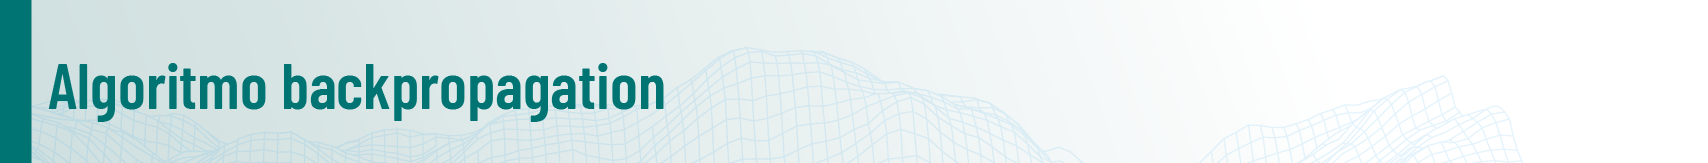

El algoritmo backpropagation ajusta (aprende) los pesos de una red multicapa, dada una estructura de red con un conjunto fijo de unidades e interconexiones. Los perceptrones multicapa (<b>MultiLayer Perceptrón - MLP</b>) son, por definición, redes neuronales de propagación hacia adelante, ya que la activación de las neuronas se hace desde la entrada (lugar donde se conectan las variables) hacia las neuronas de salida, las cuales entregan la predicción deseada ([ver cocumentación](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)).

Para describir el algoritmo backpropagation es necesario ponerse de acuerdo en la notación utilizada:

<li> La capa de entrada tendrá tantos nodos como variables (atributos o características), que notaremos $d$.</li>
<li> Un nodo es una entrada a la red o una salida de alguna unidad en la red.</li>
<li> Cada nodo tendrá un subíndice que indicará la posición del nodo en la capa y un superíndice que indicará la capa a la cual pertence el nodo. $x_{ji}$ denota la entrada a partir del nodo $i$ a la unidad $j$, y $w_{ji}^{(1)}$ denota el correspondiente peso, el cual corresponde a la capa 1.</li>
<li> El número de neuronas o unidades en cada capa es diferente y se denotará por $M_k$, donde $k$ hace referencia a la capa.</li>

**Ejemplo: Uso de la librería Neurolab**

(1500, 2)


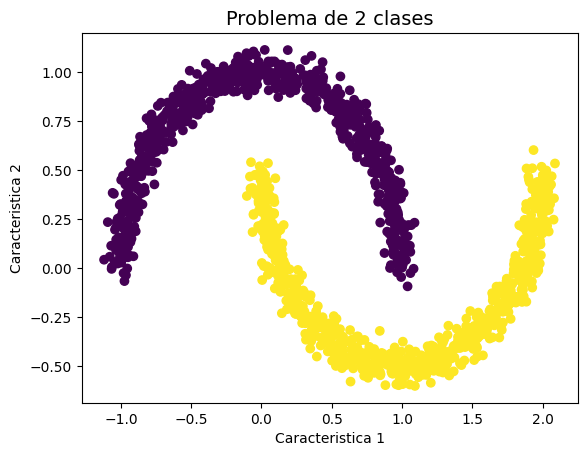

In [ ]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
print(X.shape)
plt.title('Problema de 2 clases', fontsize=14)
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.scatter(X[:,0], X[:,1], c=y);

In [ ]:
pip install neurolab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Epoch: 15; Error: 0.16108621203719709;
The goal of learning is reached


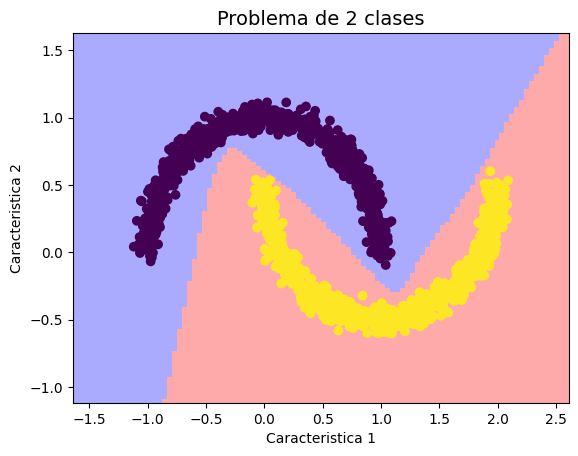

In [ ]:
import neurolab as nl
import numpy as np
from matplotlib.colors import ListedColormap
# Create train samples
input = X
target = np.array(y)[np.newaxis]
target = target.T
# Create network with 2 inputs, 5 neurons in input layer and 1 in output layer
net = nl.net.newff([[X.min(), X.max()], [y.min(), y.max()]], [5, 1],  [nl.trans.LogSig(),nl.trans.LogSig()])
# Train process
err = net.train(input, target, show=15)
# Test
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA',])
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
Z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        #print([xx[1,i],yy[j,1]])
        Z[i,j]=net.sim([[xx[1,i],yy[j,1]]])
Z = np.round(Z)
plt.title('Problema de 2 clases', fontsize=14)
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.pcolormesh(xx, yy, Z.T, cmap=cmap_light)
plt.scatter(X[:,0], X[:,1], c=y);

## <font size= 1> <font color='FFFFFF'> Batch, ninibatch y online learning

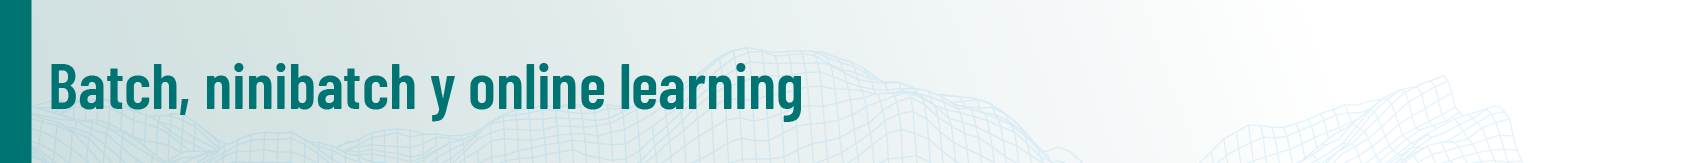



El entrenamiento que acumula todos los errores cometidos a partir de todas las muestras de entrenamiento antes de llevar a cabo la actualización de los pesos se conoce como **Batch Training**. Desafortunadamente, si el número de muestras es muy grande, el algoritmo presenta problemas de computo no solo por la cantidad de cálculos, sino también por la memoria necesaria para realizar la multiplicación de matrices. No obstante, el problema más significativo es que la trayectoria del gradiente batch tiende a estancarse en puntos silla (**Saddle Point**) de la función de costo.

Como alternativa, el entrenamiento se puede realizar propagando una sola muestra hacia adelante y realizando la actualización de los pesos a partir del error que se comete con esa muestra. Los dos pasos son repetidos para todas las muestras de entrenamiento. Esta estrategia es llamada **Online Learning** y el algoritmo resultante es llamado **Stochastic Gradient Descent (SGD)**. Debido a que el algoritmo usa una muestra aleatoria a la vez, la convergencia al óptimo es más ruidosa pero eso ayuda al algoritmo a escapar de óptimos locales y de los puntos silla.

Uno de los problemas del algoritmo SGD es que requiere muchas iteraciones para converger. Por consiguiente, una solución intermedia, llamada **Mini-batch Gradient Descent**, parte las muestras de entrenamiento en mini-batchs, y se realiza los pasos forward y backward por cada mini-batch.

Ver documentación: https://towardsdatascience.com/stochastic-batch-and-mini-batch-gradient-descent-demystified-8b28978f7f5

1 ok
2 ok
3 ok


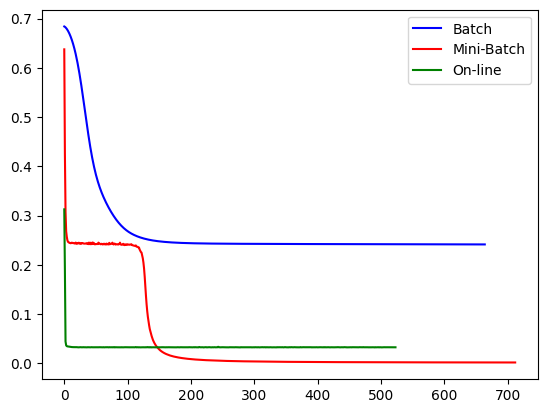

In [ ]:
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 0.1, learning_rate = 'constant', batch_size=1500, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change = 500, max_iter=2000)
clf1.fit(X, y)
print ("1 ok")
clf2 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 0.1, learning_rate = 'constant', batch_size=50, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change =500, max_iter=2000)
clf2.fit(X, y)
print ("2 ok")
clf3 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 0.1, learning_rate = 'constant', batch_size=1, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change =500, max_iter=2000)
clf3.fit(X, y)
print ("3 ok")
plt.plot(clf1.loss_curve_,color='b',label='Batch')
plt.plot(clf2.loss_curve_,color='r',label='Mini-Batch')
plt.plot(clf3.loss_curve_,color='g',label='On-line')
plt.legend()

1 ok
2 ok
3 ok


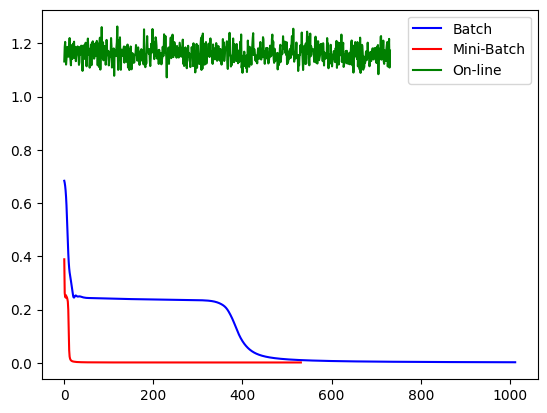

In [ ]:
clf1 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 1, learning_rate = 'constant', batch_size=1500, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change = 500, max_iter=2000)
clf1.fit(X, y)
print ("1 ok")
clf2 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 1, learning_rate = 'constant', batch_size=50, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change =500, max_iter=2000)
clf2.fit(X, y)
print ("2 ok")
clf3 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 1, learning_rate = 'constant', batch_size=1, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change =500, max_iter=2000)
clf3.fit(X, y)
print ("3 ok")
plt.plot(clf1.loss_curve_,color='b',label='Batch')
plt.plot(clf2.loss_curve_,color='r',label='Mini-Batch')
plt.plot(clf3.loss_curve_,color='g',label='On-line')
plt.legend()

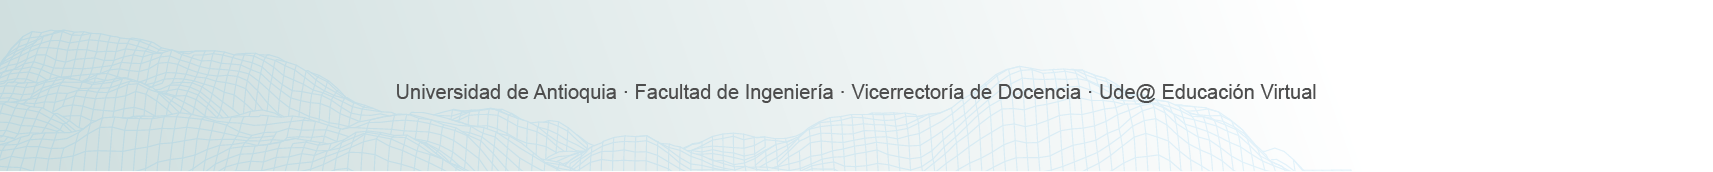